            gender          age  hypertension  heart_disease  ever_married    work_type  Residence_type  avg_glucose_level          bmi  smoking_status       stroke
count  5110.000000  5110.000000   5110.000000    5110.000000   5110.000000  5110.000000     5110.000000        5110.000000  5110.000000     5110.000000  5110.000000
mean      0.414286    43.226614      0.097456       0.054012      0.656164     2.167710        0.508023         106.147677    28.862035        1.376908     0.048728
std       0.493044    22.612647      0.296607       0.226063      0.475034     1.090293        0.499985          45.283560     7.699562        1.071534     0.215320
min       0.000000     0.080000      0.000000       0.000000      0.000000     0.000000        0.000000          55.120000    10.300000        0.000000     0.000000
25%       0.000000    25.000000      0.000000       0.000000      0.000000     2.000000        0.000000          77.245000    23.800000        0.000000     0.000000
50%       

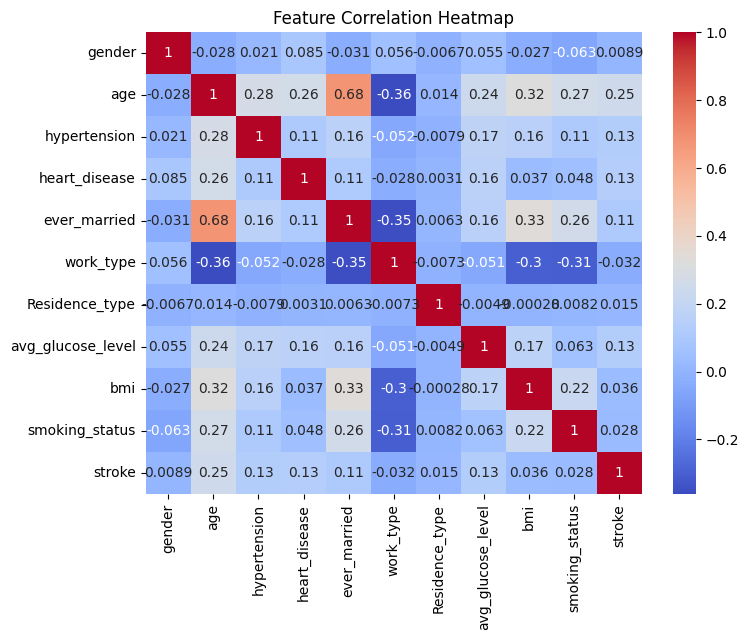

=== Logistic Regression ===
Accuracy: 0.9393346379647749
F1 Score: 0.0
Confusion Matrix:
 [[960   0]
 [ 62   0]]

=== Random Forest Classifier ===
Accuracy: 0.9393346379647749
F1 Score: 0.0
Confusion Matrix:
 [[960   0]
 [ 62   0]]

=== Comparison Table ===
                  Model  Accuracy  F1 Score
0  Logistic Regression  0.939335       0.0
1        Random Forest  0.939335       0.0

Best Parameters for Random Forest: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 100}
Final Tuned Random Forest F1 Score: 0.0


In [7]:
#Task 1 on dataset(D2) Predict whether a patient is likely to get a heart stroke

# Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Set display options to avoid output truncation
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

# Step 1:  Loading Data, Data Pre-processing, EDA

#Load Dataset
df = pd.read_csv('/content/drive/MyDrive/HIT391-Tutorial/healthcare-dataset-stroke-data.csv')

# Data Preprocessing
# Drop ID (not useful for prediction)
df.drop('id', axis=1, inplace=True)

# Fill missing BMI values with median
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

# Encode categorical columns
le = LabelEncoder()
for col in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
    df[col] = le.fit_transform(df[col])

# Exploratory Data Analysis (EDA)
print(df.describe())
print("Class Distribution:\n", df['stroke'].value_counts())

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Step 2: Feature Engineering, Creating Train, and Test Datasets

# Feature Engineering
X = df.drop('stroke', axis=1)  # Independent Variables
y = df['stroke']              # Target Variable

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Apply 2 Classification Algorithms

# Algorithm 1: Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Algorithm 2: Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Step 4 : Generate 2 Evaluation Metrics

#  Evaluation Metrics 1: Logistic Regression Evaluation
print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

#  Evaluation Metrics 2: Random Forest Evaluation
print("\n=== Random Forest Classifier ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Step 5 : Compare Results
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_rf)],
    'F1 Score': [f1_score(y_test, y_pred_lr), f1_score(y_test, y_pred_rf)]
})
print("\n=== Comparison Table ===\n", results)

# Step 6 : Fine Tune Best Algorithm (Random Forest)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid, cv=3, scoring='f1', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("\nBest Parameters for Random Forest:", grid_search.best_params_)

# Final Evaluation with Tuned Random Forest
best_rf = grid_search.best_estimator_
final_preds = best_rf.predict(X_test)
print("Final Tuned Random Forest F1 Score:", f1_score(y_test, final_preds))
